<a href="https://colab.research.google.com/github/Nyck-Phoenyx/applied-mathematics/blob/main/radicao_vs_rajadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINK PARA O CSV: https://drive.google.com/file/d/10OK0DMMAwKW0vzHWpy43Wv1_Qtxvow-8/view?usp=sharing

In [47]:
import pandas as pd

# Abre o seletor de arquivos no Colab
from google.colab import files
uploaded = files.upload()

# Carrega o CSV "dados_metereologicos_stm-csv.csv"
df = pd.read_csv("dados_metereologicos_stm-csv.csv", sep=";", engine="python")

Saving dados_metereologicos_stm-csv.csv to dados_metereologicos_stm-csv (2).csv


In [40]:
# Converte dados numéricos das colunas de interesse para float

columns_to_convert_in_selection = ["Raj. Vento (m/s)", "Radiacao (KJ/m²)"]
for col in columns_to_convert_in_selection:

  selected_columns_df[col] = selected_columns_df[col].astype(str).str.replace(",", ".", regex=False)

  # Usar errors='coerce' para transformar análises inválidas em NaN
  selected_columns_df[col] = pd.to_numeric(selected_columns_df[col], errors='coerce')

# Exibir as primeiras linhas para verificar a conversão
display(selected_columns_df.head())
# Exibir os tipos de dados para confirmar
print(selected_columns_df.info())

,Raj. Vento (m/s),Radiacao (KJ/m²)
10,2.3,8.6
11,3.0,87.6
12,3.8,731.0
13,2.9,1811.9
14,4.6,2389.2


<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 10 to 2226
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Raj. Vento (m/s)  588 non-null    float64
 1   Radiacao (KJ/m²)  589 non-null    float64
dtypes: float64(2)
memory usage: 19.6 KB
None


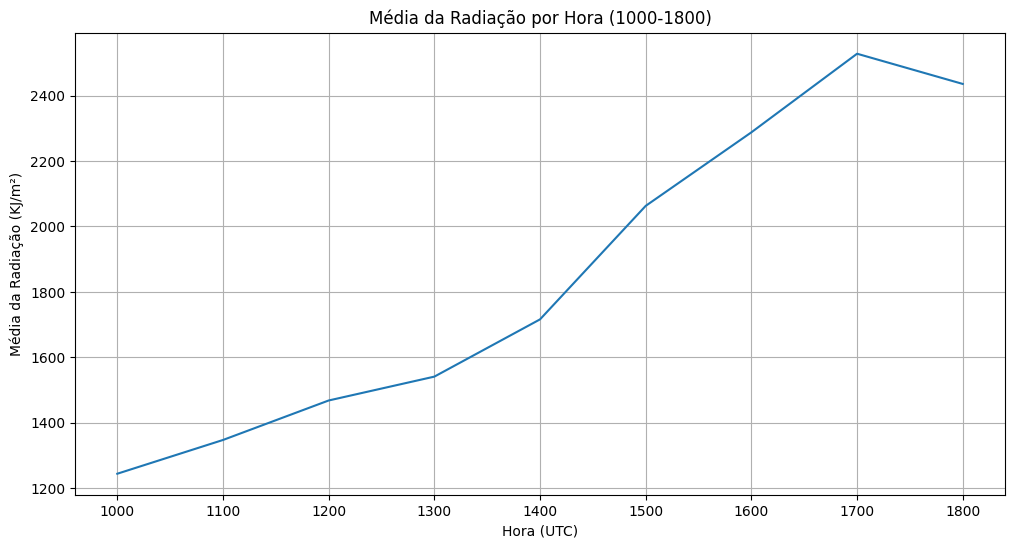

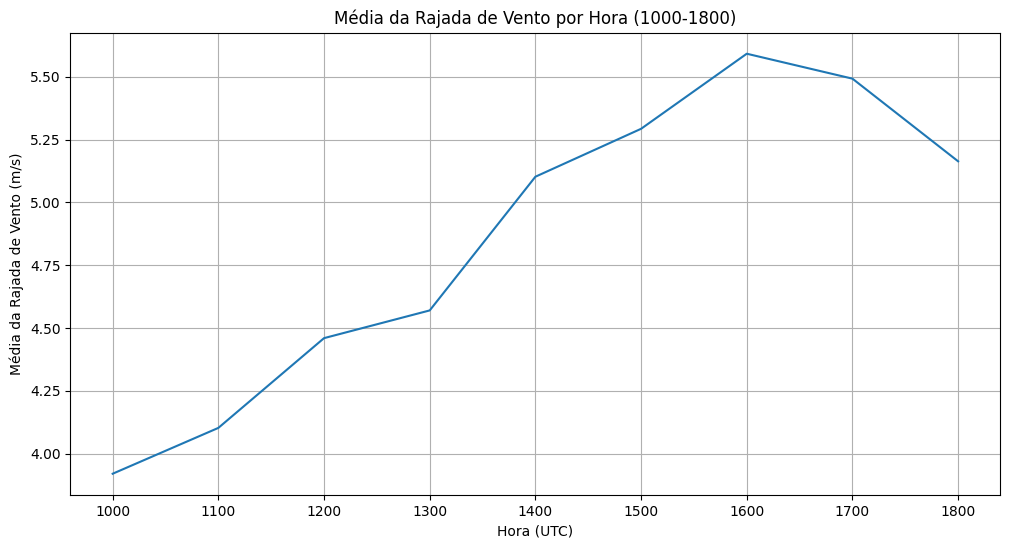

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa os dados filtrados por 'Hora (UTC)' e calcula a média para as colunas selecionadas
average_evolution = filtered_df.groupby('Hora (UTC)')[['Raj. Vento (m/s)', 'Radiacao (KJ/m²)']].mean()

# Resetar o índice
average_evolution_reset = average_evolution.reset_index()


# Plota a evolução média da Radiação (KJ/m²)
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_evolution, x=average_evolution.index, y='Radiacao (KJ/m²)')
plt.title('Média da Radiação por Hora (10:00-18:00)')
plt.xlabel('Hora (UTC)')
plt.ylabel('Média da Radiação (KJ/m²)')
plt.grid(True)
plt.show()

# Plota a evolução média da Raj. Vento (m/s)
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_evolution, x=average_evolution.index, y='Raj. Vento (m/s)')
plt.title('Média da Rajada de Vento por Hora (10:00-18:00)')
plt.xlabel('Hora (UTC)')
plt.ylabel('Média da Rajada de Vento (m/s)')
plt.grid(True)
plt.show()

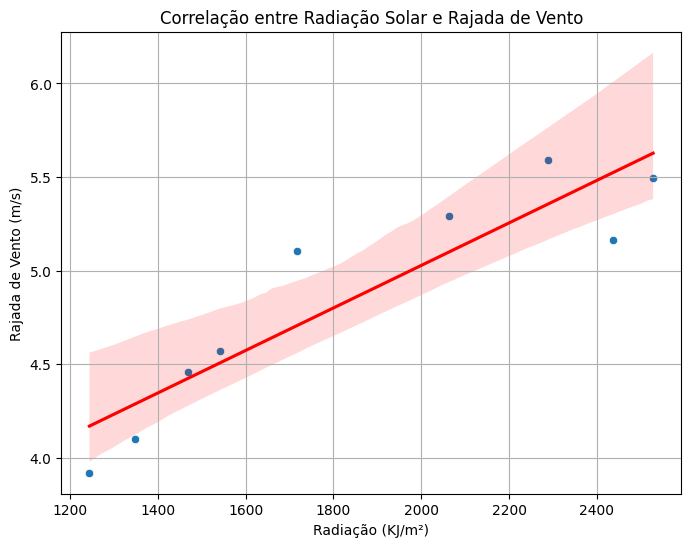

In [53]:
# Gráfico de Dispersão

plt.figure(figsize=(8,6))
sns.scatterplot(data=average_evolution_reset, x='Radiacao (KJ/m²)', y='Raj. Vento (m/s)')
sns.regplot(data=average_evolution_reset, x='Radiacao (KJ/m²)', y='Raj. Vento (m/s)', scatter=False, color='red')
plt.title('Correlação entre Radiação Solar e Rajada de Vento')
plt.xlabel('Radiação (KJ/m²)')
plt.ylabel('Rajada de Vento (m/s)')
plt.grid(True)
plt.show()


In [54]:
# Correlação de Pearson
filtered_df[['Radiacao (KJ/m²)', 'Raj. Vento (m/s)']].corr()

,Radiacao (KJ/m²),Raj. Vento (m/s)
Radiacao (KJ/m²),1.000000,0.552629
Raj. Vento (m/s),0.552629,1.000000
